In [1]:
import skimage.io
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import time
# import imagecodecs
import imageio
from PIL import Image
from scipy import ndimage
import matplotlib.patches as patches # for drawing the rectangles on the field image
import pandas as pd
import os




# read image for potato June 22, 2020
# root_folder = "E:/data/remote_sensing/2020/"
# D:\data\remote_sensing\Potato_Fertilizer_Othello_Jun22_M10_transparenr_reflectance
root_folder = "c:/data/remote_sensing/"
project_stub = "Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance"

# export path for image files
export_path = os.path.join(root_folder, (project_stub + '/export/'))
  
# Create the directory if it doesn't already exist
try: 
    os.mkdir(export_path)
    print(f"Created: {export_path}")
except:
    print(f"Already exists: {export_path}")


# define float to int functions
def convert_float_to_int(file_path):
    


    image = cv.imread(file_path, cv.IMREAD_UNCHANGED)
    # print(np.min(float_image), np.max(float_image))
    # image = np.array(float_image * 255., dtype=np.uint8)
    # print(np.min(image), np.max(image))

    return image

# rotates an image, then returns a cropped image
def rotate_and_crop(img, rot_angle, y_limits, x_limits):
    # rotate then take the subset for our crop
    return ndimage.rotate(img, angle = rot_angle)[y_limits[0]:y_limits[1], x_limits[0]:x_limits[1]]

def save_im(array, plot, index):
    
    # scale to max and min values from the whole image
  
    #rescaled = (255.0 / np.max(array) * (array - np.min(array))).astype(np.uint8)
    im = Image.fromarray(array.astype(np.uint8))
    im.save(export_path + "plot_" + str(plot) + "_index_" + index + ".png")

Already exists: c:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/export/


In [2]:
# import all the wavelengths
blue = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue.tif")
blue_444 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue-444.tif")
green = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green.tif")
green_531 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green-531.tif")
red = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red.tif")
red_650 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red-650.tif")
nir = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_nir.tif")
red_edge = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge.tif")
red_edge_705 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-705.tif")
red_edge_740 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-740.tif")


    



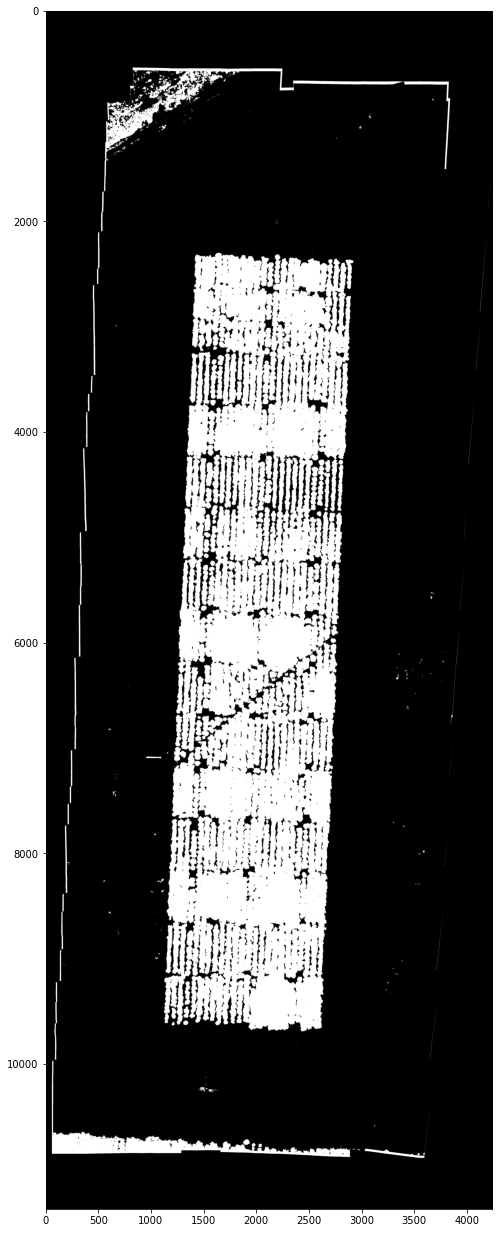

In [3]:
# show the uncropped image
rot_angle = 180
y_limits = [0, red.shape[0]]
x_limits = [0, red.shape[1]]

red_crop = rotate_and_crop(red, rot_angle, y_limits, x_limits)
nir_crop = rotate_and_crop(nir, rot_angle, y_limits, x_limits)

ndvi = (nir_crop - red_crop)/(nir_crop + red_crop)

ndvi_mask = np.where(ndvi>NDVI_TH, 1, 0)

# show the fig
plt.figure(figsize = (8,30))
plt.imshow(ndvi_mask, cmap="gray")
plt.savefig(export_path + 'uncropped_ndvi_mask.png')

0.7320283


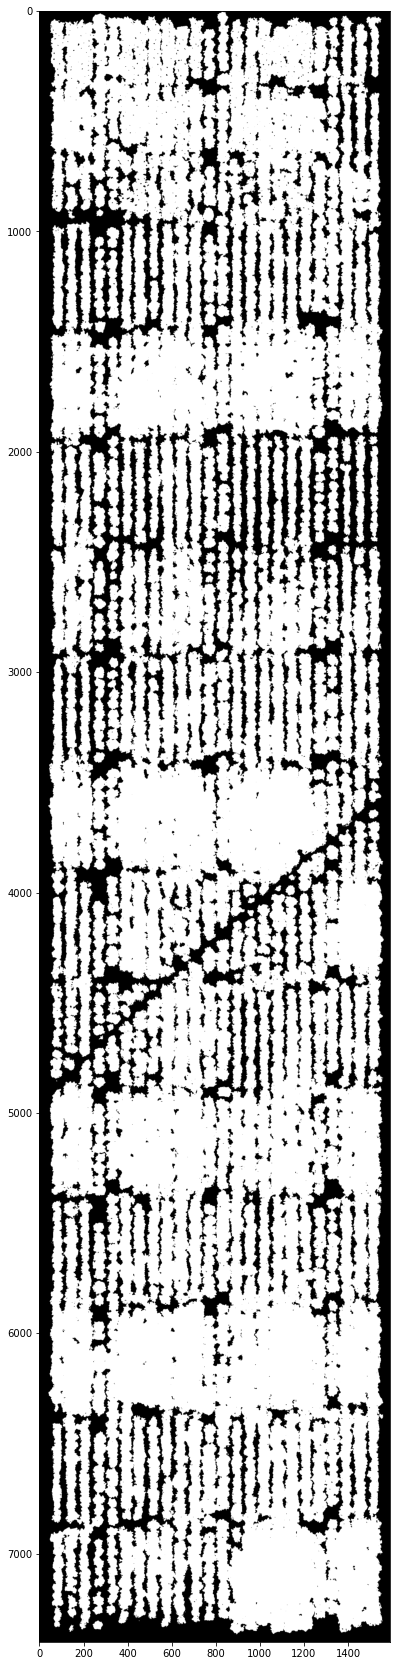

In [4]:
# definte the rotation angle and the desired field crop dimensions to isolate our region of interest
rot_angle = 182.4
y_limits = [2400, 9800]
x_limits = [1460, 3050]

# rotate and crop our red and nir bands
red_crop = rotate_and_crop(red, rot_angle, y_limits, x_limits)
nir_crop = rotate_and_crop(nir, rot_angle, y_limits, x_limits)

# calculate NDVI
ndvi = (nir_crop - red_crop)/(nir_crop + red_crop)

print(np.mean(ndvi))
mean_thresh = np.mean(ndvi)

# use the NDVI image to create a mask
ndvi_mask = np.where(ndvi>mean_thresh, 1, 0)

# # show NDVI
# plt.figure(figsize = (8,30))
# plt.imshow(ndvi, cmap="gray")
# plt.savefig('ndvi.png')

# show the mask
plt.figure(figsize = (8,30))
plt.imshow(ndvi_mask, cmap="gray")
plt.savefig(export_path + 'ndvi_mask.png')

In [5]:
# # show the red data
# plt.figure(figsize = (8,30))
# plt.imshow(nir_crop, cmap="gray")
# plt.savefig(export_path + 'nir_crop.png')

In [6]:
# create a hypercube of all the layers
channels = [blue, blue_444, green, green_531, red, red_650, nir, red_edge, red_edge_705, red_edge_740]

field_image = np.zeros(shape=(red_crop.shape[0], red_crop.shape[1], len(channels)))
print(field_image.shape)

# rotate all the images and crop them and create the field_image hypercube of just cropped/rot image channels
for c_idx, channel in enumerate(channels):
    
    channel = rotate_and_crop(channel, rot_angle, y_limits, x_limits)
#     print(f"channel.shape: {channel.shape}, ndvi_mask.shape: {ndvi_mask.shape}")
    
    
#     channel = np.multiply(channel, ndvi_mask)
    
    field_image[:,:,c_idx] = channel

bands_dict = {"blue": channels[0],
              "blue_444": channels[1],
              "green": channels[2],
              "green_531": channels[3],
              "red": channels[4],
              "red_650": channels[5],
              "nir": channels[6],
              "red_edge": channels[7],
              "red_edge_705": channels[8],
              "red_edge_740": channels[9]
             }
    

    
    
    
# # combine the channels into a single multilayerd image
# for i in range(0, len(channels)):
#     field_image[:,:,i] = rotate_and_crop(channels[i], rot_angle, y_limits, x_limits)
    
# import the plot map and ground truth data
ground_truth = pd.read_csv("C:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/2020-06-22_potato_yield_fertsplit.csv")

# create our plot index
plot_index = 0
df = pd.DataFrame(columns=['plot_id', 'origin', 'width', 'height'])

# create all our indices
# img_masked





# create channel dict
channel_dict = {'blue': 0, 'blue_444': 1, 'green': 2, 'green_531': 3, 'red': 4, 'red_650': 5, 'nir': 6, 'red_edge': 7, 'red_edge_705': 8, 'red_edge_740': 9}

# create the list that will hold the indices chosen
indices = []
index_name_list = []

# create list of indices
for i, v in channel_dict.items():
    current_channel = channel_dict[i]
    for j, b in channel_dict.items():
        index_combo = (current_channel, channel_dict[j])
        if index_combo not in indices and (index_combo[1] - index_combo[0] != 0):
            indices.append((current_channel, channel_dict[j]))
            index_name = "(" + i + "-" + j + ")/(" + i + "+" + j + ")"
            print(index_name)
            index_name_list.append(index_name)
print(len(indices))
img_indices = np.zeros(shape=(field_image.shape[0], field_image.shape[1], len(indices)))
print(img_indices.shape, "is the img_indices shape")
            
            
# # calculate the indices and store them in the img_indices
for i, idx in enumerate(indices):     
    # choose bands
    band1 = field_image[:, :, idx[0]]
    band2 = field_image[:, :, idx[1]]
    
    # calculate the index
    print(idx[0], idx[1])
    current_index = np.divide(np.subtract(band1, band2), np.add(band1, band2))
    
#     rescaled_index = (255.0 / np.max(current_index) * (current_index - np.min(current_index))).astype(np.uint8)
    # mask the index
#     img_indices[:,:, i] = np.multiply(current_index, ndvi_mask)
#     img_indices[:,:, i] = current_index
    img_indices[:,:, i] = current_index
     
    
print(f"The img_indices.shape is {img_indices.shape}")

(7400, 1590, 10)
(blue-blue_444)/(blue+blue_444)
(blue-green)/(blue+green)
(blue-green_531)/(blue+green_531)
(blue-red)/(blue+red)
(blue-red_650)/(blue+red_650)
(blue-nir)/(blue+nir)
(blue-red_edge)/(blue+red_edge)
(blue-red_edge_705)/(blue+red_edge_705)
(blue-red_edge_740)/(blue+red_edge_740)
(blue_444-blue)/(blue_444+blue)
(blue_444-green)/(blue_444+green)
(blue_444-green_531)/(blue_444+green_531)
(blue_444-red)/(blue_444+red)
(blue_444-red_650)/(blue_444+red_650)
(blue_444-nir)/(blue_444+nir)
(blue_444-red_edge)/(blue_444+red_edge)
(blue_444-red_edge_705)/(blue_444+red_edge_705)
(blue_444-red_edge_740)/(blue_444+red_edge_740)
(green-blue)/(green+blue)
(green-blue_444)/(green+blue_444)
(green-green_531)/(green+green_531)
(green-red)/(green+red)
(green-red_650)/(green+red_650)
(green-nir)/(green+nir)
(green-red_edge)/(green+red_edge)
(green-red_edge_705)/(green+red_edge_705)
(green-red_edge_740)/(green+red_edge_740)
(green_531-blue)/(green_531+blue)
(green_531-blue_444)/(green_531+blu

field_image.shape[0]: 7400, nir_crop.shape[0]: 7400
332 160
plot 0, NDVI np.max: 0.9381569813939863, np.min:0.005676767521801007, np.mean:0.5855884904126643
332 160
plot 1, NDVI np.max: 0.9502912954081835, np.min:0.07798349241802921, np.mean:0.7056698707633969
332 160
plot 2, NDVI np.max: 0.9623928232773843, np.min:0.08706510482070848, np.mean:0.8275482532338344
332 160
plot 3, NDVI np.max: 0.9504577064712217, np.min:0.10774874198006394, np.mean:0.7501212167583988
332 160
plot 4, NDVI np.max: 0.9562021851681, np.min:0.09543419725179482, np.mean:0.8080585531199914
332 160
plot 5, NDVI np.max: 0.9487841528638249, np.min:0.08402837071407042, np.mean:0.6919170063511376
332 160
plot 6, NDVI np.max: 0.9516104802959303, np.min:0.06901273273966174, np.mean:0.7315703156486137
332 160
plot 7, NDVI np.max: 0.9543241024887662, np.min:0.09577579038497407, np.mean:0.8073937851494235
332 160
plot 8, NDVI np.max: 0.9434156717758143, np.min:0.10893506433692733, np.mean:0.7129068389095952
332 160
plot 9

[5 rows x 97 columns]


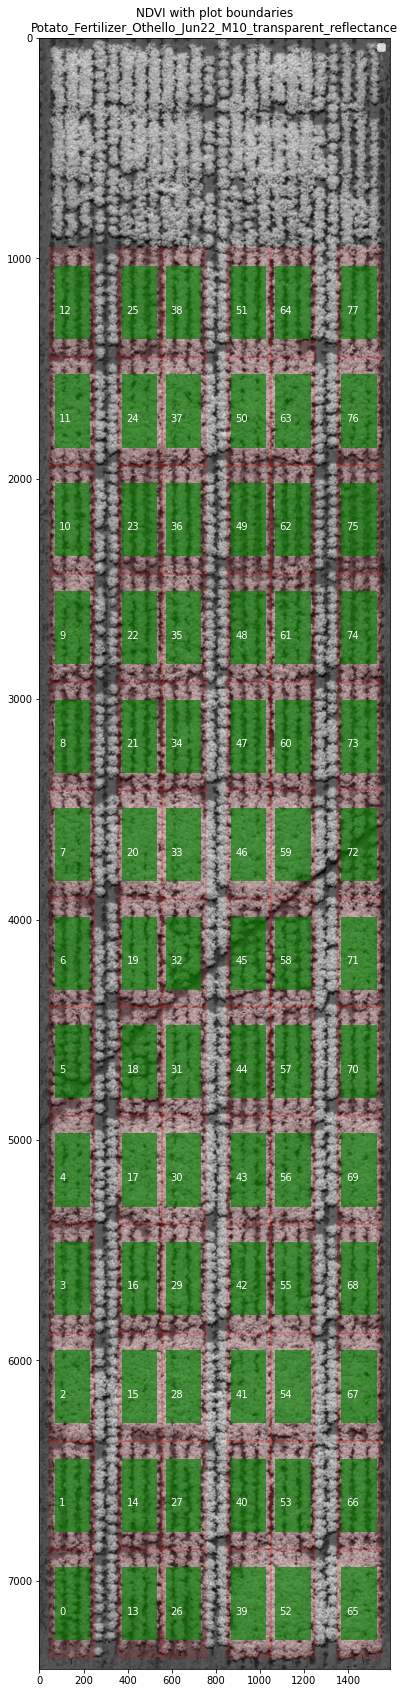

In [7]:
# show plot boundaries and do all the calculations for plot values in this cell

plot_height = 492
plot_width = 200
x_origins = [50, 355, 555, 850, 1050, 1350]
# x_origins = [1350, 1050, 850, 535, 335, 50] # RIGHT TO LEFT
y_origin = field_image.shape[0] - plot_height - 50

print(f"field_image.shape[0]: {field_image.shape[0]}, nir_crop.shape[0]: {nir_crop.shape[0]}")
edge_buf = 40

# list to keep a hold of the plot coordinates
plot_list = []

# define field image and subplots
figure, ax = plt.subplots(1, figsize=(8,30))

# Displays an image
ax.imshow(nir_crop, cmap="gray")
# ax.set_xlabel('time (s)')
ax.set_title('NDVI with plot boundaries\n' + project_stub)
plt.gca().legend(('plot border', 'plot region of interest'))
# ax.set_ylabel('Undamped')
i = 0
# add rectangle patches to image

# we create an instance of an object. This will be a dataframe, but there isn't anything to put in it yet.
df = None




# keep track of the plot ID with an index. We add one at the beginning of each loop, so we start with -1 so the first is 0
i = -1

# iterate through all the plot coordinates
for x_row_num, x_coord in enumerate(x_origins):
    for range_y in range(0, 13):
        
        # increment i to keep track of plot ID
        i += 1
        
        # what is the current plot origin point
        current_point = (x_coord, y_origin - range_y * plot_height)
    
        # find the center of the plot for a text label
        plot_center = (current_point[0] + .5 * plot_width, current_point[1] + .5 * plot_height)
        
        roi_width = plot_width - edge_buf
        roi_height = plot_height - 4 * edge_buf
        print(roi_height, roi_width)
        
        # save these coordinates and plot id in a dict
        plot_dict = {"plot_id":i,
                     "row_num": x_row_num,
                     "range_num": range_y,
                    "origin":(int(current_point[0] + .5 * edge_buf), int(current_point[1] + 2 * edge_buf))}
        
        # add a rectangle showing the plot bounadies
        rect_line = patches.Rectangle((current_point[0], current_point[1]), plot_width, plot_height, edgecolor='r', lw=2, facecolor="r", alpha=.1)
        ax.add_patch(rect_line)

        # show the subsection of the plot that we are using
        rect_fill  = patches.Rectangle(xy=plot_dict["origin"],
                                        width=roi_width, 
                                        height=roi_height, 
                                        edgecolor='None', 
                                        facecolor="green", 
                                        alpha=.4)
        ax.add_patch(rect_fill)
        
        # show plot ID on the map
        ax.text(plot_center[0] - .3 * plot_width, plot_center[1] + .1 * plot_height, i, c='white')       
        ax.add_patch(rect_fill)
        
    
        # create roi coordinates for data slice
        x0 = plot_dict["origin"][0]
        x1 = plot_dict["origin"][0] + plot_width
        y0 = plot_dict["origin"][1]
        y1 = plot_dict["origin"][1] + plot_height

    
        # define the bands used for calculating our non-NDSI features
        # we use these to create our NDVI mask as well
#         channels = [blue, blue_444, green, green_531, red, red_650, nir, red_edge, red_edge_705, red_edge_740]
        
        nir1 = field_image[y0:y1, x0:x1, 6]
#         print(f"plot {i}, nir1 np.max: {np.max(nir1)}, np.min:{np.min(nir1)}")
        red1 = field_image[y0:y1, x0:x1, 4]
#         print(f"plot {i}, red1 np.max: {np.max(red1)}, np.min:{np.min(red1)}")
        
        green1 = field_image[y0:y1, x0:x1, 2]
#         print(f"plot {i}, green1 np.max: {np.max(green1)}, np.min:{np.min(green1)}")
        
        blue1 = field_image[y0:y1, x0:x1, 0]
#         print(f"plot {i}, blue1 np.max: {np.max(blue1)}, np.min:{np.min(blue1)}")
        
        # calculate the SIs
        NDVI = (nir1 - red1) / (nir1 + red1)
        print(f"plot {i}, NDVI np.max: {np.max(NDVI)}, np.min:{np.min(NDVI)}, np.mean:{np.mean(NDVI)}")
        save_im(NDVI, i, "NDVI")
        
        SAVI = (1.5 * (nir1 + red1))/(0.5 + nir1 + red1)
        save_im(SAVI, i, "SAVI")
      
        GCI = (nir1)/(green1 - 1)
        save_im(GCI, i, "GCI")
        
#         TGI = np.divide((((red1 - blue1)(red1 - green1)) - ((red1 - green1)(red1 - blue1))), 2)
#         save_im(TGI, i, "TGI")
        
        # calculate NDVI_mask
        NDVI_mask = np.where(NDVI > NDVI_TH, 1, 0) 
        save_im(NDVI_mask, i, "NDVI_mask")
        
        # get mean of masked index image and add to dict
        plot_dict["NDVI_mean"] = np.mean(np.multiply(NDVI, NDVI_mask))
        plot_dict["SAVI_mean"] = np.mean(np.multiply(SAVI, NDVI_mask))
        plot_dict["GCI_mean"] = np.mean(np.multiply(GCI, NDVI_mask))

        # iterate through all the layers in the img_indices and come up with ROI and values
        for index in range(img_indices.shape[2]):
            # create the roi
            roi = img_indices[y0:y1, x0:x1, index]
            
            # mask the roi with the NDVI mask
            roi_masked = np.multiply(roi, NDVI_mask)
            
            # get mean of masked index image and add to dict
            plot_dict[(str(index) + "_mean").strip()] = np.mean(roi_masked)
    
            if i == 0:
                save_im(roi_masked, i, str(index))

        # if the df doesn't exist, create it
        if df is not None:
            df = df.append(plot_dict,ignore_index=True)
        else:
            df = pd.DataFrame.from_dict(plot_dict)
                     
        
        
            
        
        
        
        
#         channels = [blue, blue_444, green, green_531, red, red_650, nir, red_edge, red_edge_705, red_edge_740]
#         field_image = np.zeros(shape=(red_crop.shape[0], red_crop.shape[1], len(channels)))
        
            
#         roi = imcg_indices[y0:y1, x0:x1, index]
            
        
#             # add the index mean value into dictionary
#             plot_dict[(str(index) + "_mean").strip()] = np.mean(roi)
            

print(df.head())
print(df.tail())

# # now take that dictionary, turn it into a data frame
# df2 = pd.DataFrame.from_dict(my_dict)

    

plt.savefig(export_path + "plot_map_boundaries.png")

# print(f"expected 13 range x 6 rows = 78 total plots, actual plots: {i}")







# # take all the columns in df2 and add them into our original data frame
# for col in df2.columns:
#     df[col] = df2[col]
    
# # take a look at it
# print(df.head)

# join it to ground truth

# delete a column 
del df['origin']
df.to_csv('df.csv')


In [8]:
# reimport the plot map and ground truth data
ground_truth = pd.read_csv("C:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/2020-06-22_potato_yield_fertsplit.csv")

# reindex ground_truth to desired column order
#pandas.DataFrame.reindex(columns=column_names)
column_order = ["plot_id", 
                "rep",
                "var_num",
                "treatment",
                "yield"
               ]
gt2 = ground_truth.reindex(columns=column_order)
gt2.head()

,plot_id,rep,var_num,treatment,yield
0,12,1,2,2,641.218827
1,11,1,1,2,697.979880
2,9,1,1,8,709.891479
3,8,1,2,6,674.191672
4,7,1,1,6,680.430664


In [ ]:
# 
# %%%%% Correlating each set of NDSI with rating
# T=permute(NDSI,[3,2,1]);
# 
# for n=1:size(T,3)
# for m=1:size(T,2)
# [r, p] =corrcoef(T(:,m,n),y);

# C(n,m) = r(1,2);
# Pval(n,m) = p(1,2);
# 
# clear r p
# end
# end





# 
# % pot contour-correlation map
# UU=triu(C,1); % upper triangular part of matrix
# UU(UU==0)=NaN;
# UU=UU';
# X=Wlenghts;
# Y=Wlenghts;
# figure; contourf(X,Y,UU); colorbar ('east');colormap(parula); grid off; 
# xlabel('Wavelength (nm)') % x-axis label
# ylabel('Wavelength (nm)') % y-axis label
# set(gca, 'FontSize',16, 'FontName','Times New Roman','xtick',[630,800,1000,1200,1400,1600],'ytick',[630,800,1000,1200,1400,1600]);
# 
# % find significant p values
# Pmat=triu(Pval,1); % upper triangular part of matrix
# Pmat(Pmat==0)=NaN;
# Pmat=Pmat';
# [row, col]=find(Pmat <= 0.05);
# rc=horzcat(row,col);
# 
# WL=Wlenghts;
# 
# for q=1:size(row,1)
#     cor(q)=UU(row(q),col(q));   %% find the correlation values of the selected rows and columns
#     P(q)=Pmat(row(q),col(q));   %% find p-values of the selected rows and columns
#     PP(q,1)=WL(col(q)); %% find the reflectance coordinates (Ri) and values of the selected selected ratios NDSI=(Ri-Rj)/(Ri+Rj)
#     PPP(q,1)=WL(row(q));%% find the reflectance coordinates (Rj) and values of the selected selected ratios NDSI=(Ri-Rj)/(Ri+Rj)
# end
# WLP=horzcat(PP,PPP);
# NDSIcor=vertcat(WLP',cor,P);
# clear cor P PP PPP
# 
# % Extracting the ratios associated with high correlations
# for v=1:size(rc,1)
#     Ratio(:,v)=T(:,rc(v,1),rc(v,2));
# end
# 
# %% significant NDSIs
# Selected=vertcat(WLP',Ratio);

In [10]:
column_order = ["plot_id", 
                "rep",
                "var_num",
                "treatment",
                "yield"
               ]
gt3 = ground_truth.reindex(columns=column_order)
df3 = pd.merge(gt3, df)
df3.to_csv('df3.csv')

df3 = df3[["yield",
            "plot_id",
            "var_num",
            "treatment",
          "rep",
          "row_num",
          "range_num"]]



df3.head()





,yield,plot_id,var_num,treatment,rep,row_num,range_num
0,641.218827,12,2,2,1,0,12
1,697.979880,11,1,2,1,0,11
2,709.891479,9,1,8,1,0,9
3,674.191672,8,2,6,1,0,8
4,680.430664,7,1,6,1,0,7


In [ ]:
# how many of each
print(len(df3["yield"]))
temp_df = df3.dropna()

ax = temp_df["treatment"].plot.hist(bins=9, alpha=0.5)
plt.title('histogram of treatments', fontsize='large')
plt.xlabel("treatment")

# print(len(temp_df["yield"]))
# temp_df = temp_df[["var_num", "treatment", 'rep']]
temp_df.groupby(['var_num', 'treatment']).count()

In [ ]:
import scipy
r, p = scipy.stats.pearsonr(df3["yield"], df3["treatment"])
print(f"r2:{r}" + "\n" + f"p-value:{p}")
 

In [ ]:
from scipy import stats

def plot_cor_matrix(corr, mask=None, cmap=None):
    f, ax = plt.subplots(figsize=(11, 9))
    
    plt.title('Correlation coefficient heatmap of plot variables ', fontsize='large')
    
    sns.heatmap(corr, ax=ax,
                mask=mask,
                cmap=cmap,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                linewidths=2, linecolor='white', cbar_kws={'orientation': 'horizontal'})
    plt.savefig(export_path + 'yield_plotvars_heatmap.png')


# compute the correlation matrix
corr = df3.corr()

#cmap
cmap = sns.diverging_palette(240, 10, center="light",as_cmap=True)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask = np.invert(np.tril(p_values<0.05))

# create the plot
plot_cor_matrix(corr, mask, cmap)

# show the plot
plt.show()


df3.to_csv('df2.csv')
# # set up the matplotlib figure
# f, ax = plt.subplots(figsize=(8,8))

# # generate a custom diverging colormap
# # cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
# cmap = sns.diverging_palette(240, 10, center="light",as_cmap=True)

# # draw the heatmap with the mask and the correct aspect ratio
# sns.heatmap(corr,
#             cmap=cmap,
#             mask=mask,
#             vmax=1, center=0, vmin = -1,
#             square=True, linewidths=2,cbar_kws={"shrink":1},
#            annot=True)

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)
# Add title and axis names


# # generate a custom diverging colormap
# # cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# # draw the heatmap with the mask and the correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=2,cbar_kws={"shrink":.5})

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)



In [ ]:
from scipy.stats import pearsonr
column_names = ["plot_id", "treatment", "var_num", "rep", "range_num", "row_num"]
print("correlation between yield and other plot variables")
for i in column_names:
    r, p = pearsonr(df3["yield"], df3[i])
    if p < 0.05:
        sig = "*"
    else:
        sig = ""
    print(f"{i}{sig}: r={round(r, 4)}, p-value: {round(p, 4)}")

In [ ]:
# merge the df and gt2 
df2 = pd.merge(gt2, df)
print(df.shape, df2.shape)

In [ ]:
import seaborn as sns

# compute the correlation matrix
corr = df2.iloc[:,9:104].corr()
 
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(30,30))

# Add title and axis names
plt.title('Correlation coefficient heatmap of yield and SIs', fontsize=36)
ax.set_xlabel('xlabel')
plt.ylabel('yield and features')

# generate a custom diverging colormap
# cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=2,cbar_kws={"shrink":.5})

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)
plt.savefig(export_path + 'ndsi_yield_heatmap.png')

In [ ]:
import seaborn as sns

# compute the correlation matrix
corr = df2.iloc[:,9:104].corr()
 
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(30,30))

# generate a custom diverging colormap
# cmap = sns.diverging_palette(220,20, center="dark", n=10, as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=2,cbar_kws={"shrink":.5})

# heatmap = sns.heatmap(corr)
# heatmap.fig.set_figwidth(12)
# heatpmap.fig.set_figheigth(12)



In [ ]:
# # # show the red data
# plt.figure(figsize = (8,30))
# plt.imshow(NDVI_mask, cmap="gray")
# # # plt.savefig(export_path + 'nir_crop.png')
# # # # create list of indices
# # # for i, v in channel_dict.items():
# # #     current_channel = channel_dict[i]
# # #     for j, b in channel_dict.items():
# # #         index_combo = (current_channel, channel_dict[j])
# # #         if index_combo not in indices and (index_combo[1] - index_combo[0] != 0):
# # #             indices.append((current_channel, channel_dict[j]))
# # #             index_name = "(" + i + " - " + j + ")/(" + i + " + " + j + ")"
# # #             print(index_name)
# # #             index_name_list.append(index_name)

In [ ]:

# my_dict = {'plot_id': df['plot_id']}

# # iterate through all the indices

# for i, index in enumerate(indices):
#     plot_id = []
#     mean_list = []
#     median_list = []
#     std_list = []
#     min_list = []
#     max_list = []
        
#     # iterate through the set of coordinates, and select the region of interest to calculate parameters
#     for j, coords in enumerate(df['coords']):
        
#         roi = img_indices[coords[0]:coords[0] + plot_height, coords[1]:coords[1]+plot_width, i]
           
#         # mean intensity
#         mean_list.append(np.mean(roi))
        
#         # median intensity
#         median_list.append(np.median(roi))
        
#         # standard deviation
#         std_list.append(np.std(roi)) 
        
#         # min intensity
#         min_list.append(np.min(roi))
        
#         # max intensity
#         max_list.append(np.max(roi))
        

#     # add the index lists into dictionary
#     my_dict[(str(i) + "_mean").strip()] = mean_list
#     my_dict[(str(i) + "_med").strip()] = median_list
#     my_dict[(str(i) + "_std").strip()] = std_list
#     my_dict[(str(i) + "_min").strip()] = min_list
#     my_dict[(str(i) + "_max").strip()] = max_list


# # now take that dictionary, turn it into a data frame
# df2 = pd.DataFrame.from_dict(my_dict)

# # take all the columns in df2 and add them into our original data frame
# for col in df2.columns:
#     df[col] = df2[col]
    
# # take a look at it
# print(df.head)

# # save it to disk
# df.to_csv((project_stub + '_hyperindices.csv').strip())

In [ ]:
# # # calculate all of the plot id and plot origin points, and add them to our data frame
# # for row in range(0, plot_row):
# #     for col in range(0, plot_col):
# #             # plot_id for merging later, get from plot map document
# #             plot_id = plot_map.iloc[row, col + 1]
# #             plot_index += 1
            
# #             # find the upper left origin
# #             current_point = (xy_begin[0] + row * plot_height, xy_begin[1] + col * plot_width)

# #             # add this to the dataframe
# #             df = df.append({'plot_id': plot_id,'coords': current_point},ignore_index=True)
    
# # # plot ndvi to check that our indices work and that our plots are correct
# # define field image and subplots
# img = img_indices[:,:,35]
# figure, ax = plt.subplots(1, figsize=(5,30))

# # Displays an image
# ax.imshow(img, cmap="gray")
# # ax.set_xlabel('time (s)')
# ax.set_title('NDVI with plot boundaries')

# # ax.set_ylabel('Undamped')

# # # add rectangle patches to image
# # for coord in df['coords']:
# #     rect = patches.Rectangle((coord[1],coord[0]),plot_width,plot_height, edgecolor='r', facecolor="none")
# #     ax.add_patch(rect)

   
    
# # plt.savefig(export_dir + "plot_map_boundaries.png")    

    
    
# # populate the data frame with some mean values of the plots at each index
# # TODO figure out the whole extraction and saving data thing
# #               # create the plot roi
# #             roi_crop = img_indices[current_point[0]:current_point[0] + plot_height, 
# #                                    current_point[1]:current_point[1]+plot_width, 
# #                                    :]
            
            
# # for i, index in enumerate(indices):
# #     mean_plot_value = np.mean(roi_crop[:,:,i])
# #     df = df.append({str(index): index,
# #                     (str(index)+"_mean"): mean_plot_value
# #                    }, ignore_index=True)

# # 







            
            

# # # # # merge our extracted features to the ground truth data
# # df = pd.merge(df,ground_truth,on='plot_id')
# # print(df.head)
# # # print("Time elapsed: ", time.time() - start_time)

In [ ]:

# my_dict = {'plot_id': df['plot_id']}

# # iterate through all the indices

# for i, index in enumerate(indices):
#     plot_id = []
#     mean_list = []
#     median_list = []
#     std_list = []
#     min_list = []
#     max_list = []
        
#     # iterate through the set of coordinates, and select the region of interest to calculate parameters
#     for j, coords in enumerate(df['coords']):
        
#         roi = img_indices[coords[0]:coords[0] + plot_height, coords[1]:coords[1]+plot_width, i]
           
#         # mean intensity
#         mean_list.append(np.mean(roi))
        
#         # median intensity
#         median_list.append(np.median(roi))
        
#         # standard deviation
#         std_list.append(np.std(roi)) 
        
#         # min intensity
#         min_list.append(np.min(roi))
        
#         # max intensity
#         max_list.append(np.max(roi))
        

#     # add the index lists into dictionary
#     my_dict[(str(i) + "_mean").strip()] = mean_list
#     my_dict[(str(i) + "_med").strip()] = median_list
#     my_dict[(str(i) + "_std").strip()] = std_list
#     my_dict[(str(i) + "_min").strip()] = min_list
#     my_dict[(str(i) + "_max").strip()] = max_list


# # now take that dictionary, turn it into a data frame
# df2 = pd.DataFrame.from_dict(my_dict)

# # take all the columns in df2 and add them into our original data frame
# for col in df2.columns:
#     df[col] = df2[col]
    
# # take a look at it
# print(df.head)

# # save it to disk
# df.to_csv((project_stub + '_hyperindices.csv').strip())

In [ ]:
# print(red1)
# print(NDVI)